In [1]:
import pandas as pd
import math
import numpy as np
import scipy as scp
import scipy.stats as scs
import scipy.constants as scc
import matplotlib.pyplot as plt
%matplotlib inline

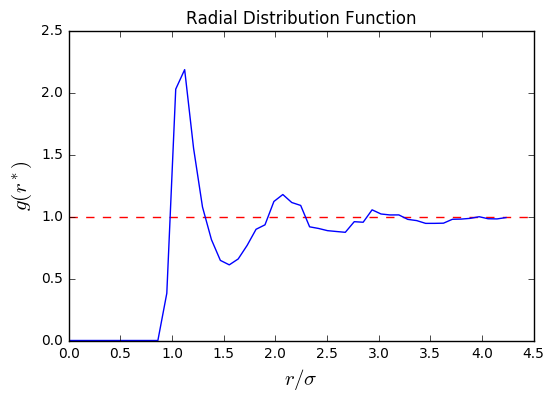

Потенциальная энергия на частицу: -5.25945299116

Плотность: 0.8442
Давление: 3.0419538817


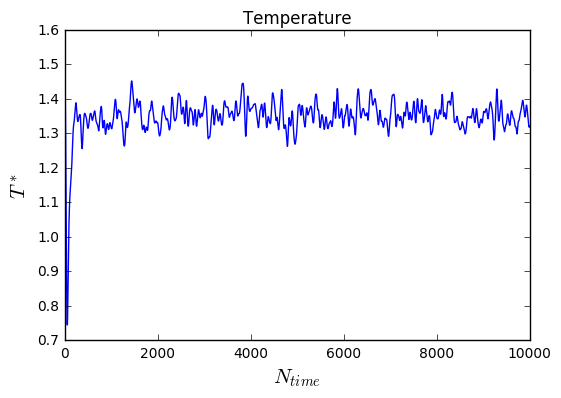

Среднее значение: 1.3475929108
Дисперсия: 0.00276907131449


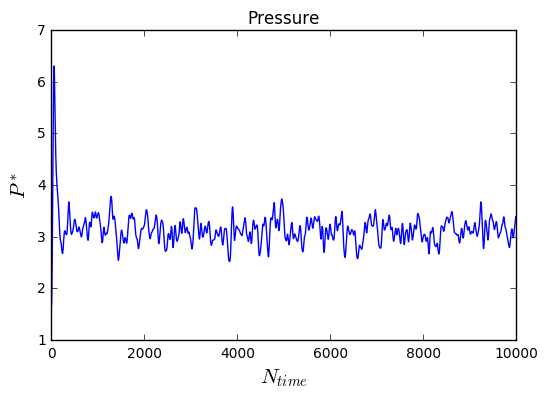

Среднее значение: 3.1377029377
Дисперсия: 0.0891742666069


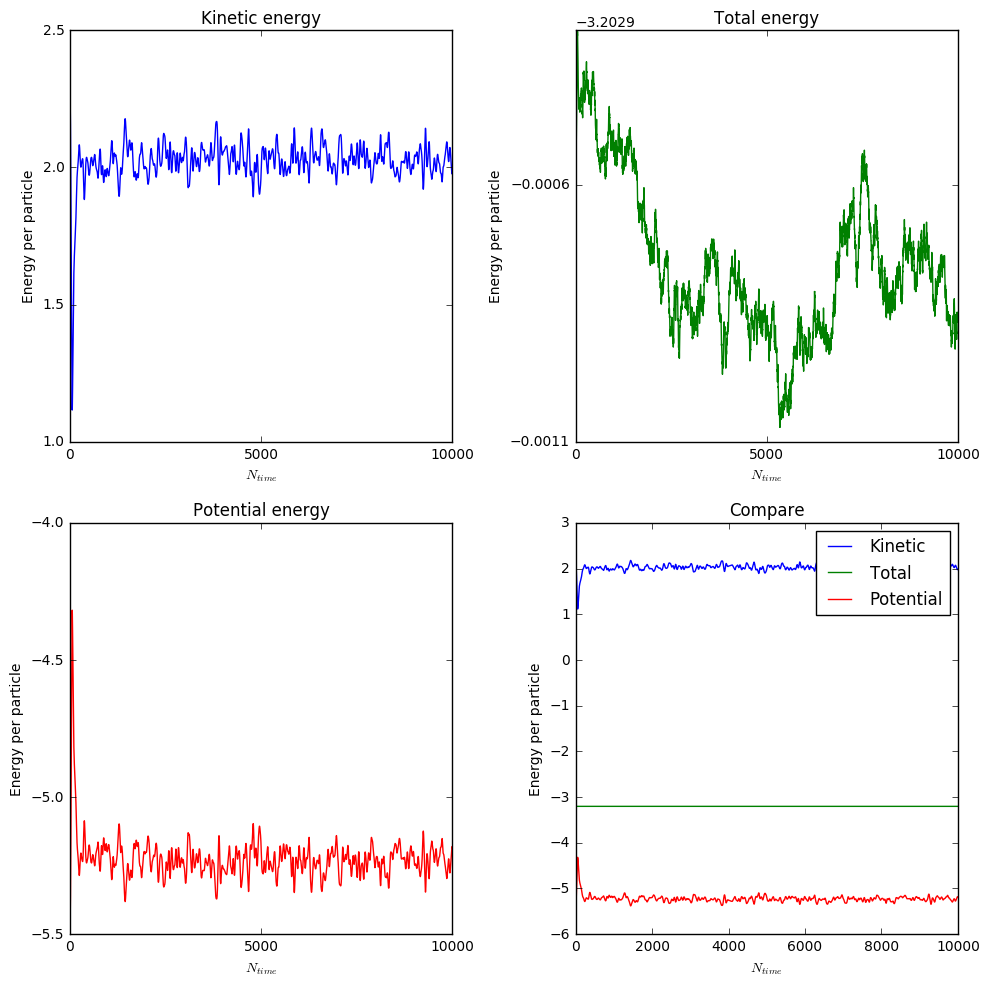

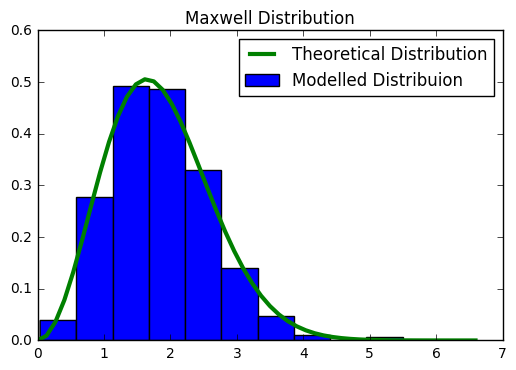

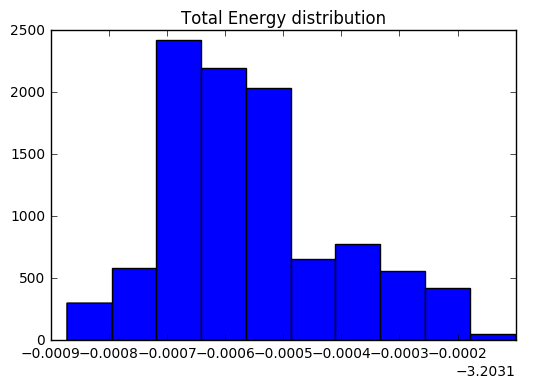

Energy Mean: -3.203657781
Fluctuation: 0.00456483135623 percent


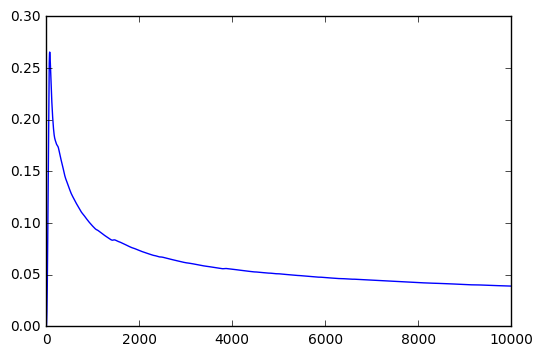

In [336]:
data_press = pd.read_csv('data/press.csv', header=None)
data_vir = pd.read_csv('data/vir.csv', header=None)
data_energy = pd.read_csv('data/energy.csv', header=None)
data_kinetic = pd.read_csv('data/kinetic.csv', header=None)
data_poten = pd.read_csv('data/poten.csv', header=None)
data_temp = pd.read_csv('data/temp.csv', header=None)
data_raddistr = pd.read_csv('data/raddistr.csv', header=None)
data_velocity = pd.read_csv('data/velocity.csv', header=None)
data_init_velocity = pd.read_csv('data/init_velocity.csv', header=None)
data_init_velocity_nosq = pd.read_csv('data/init_velocity_nosq.csv', header=None)
data_raddistr = pd.read_csv('data/raddistr.csv', header=None)
data_len = pd.read_csv('data/len.csv', header=None)
data_rho = pd.read_csv('data/rho.csv', header=None)


# График Функции Радиального Распределения
nhis = 50

delg = data_len[0] / (2 * nhis)
rvals = np.linspace(0, float(delg*nhis), nhis)

plt.plot([0,4.5],[1,1], 'r--')
plt.plot(rvals, data_raddistr[0])
plt.title("Radial Distribution Function")
plt.xlabel("$r/\sigma$", fontsize=15)
plt.ylabel("$g(r^*)$", fontsize=15)
plt.show()
def Poten(r):
    return 4 * ((1/(r**12)) - (1/(r**6)))
rho = float(data_rho[0])
res = 0
for i in range(nhis):
    if rvals[i] != 0:
        tmp = 2 * np.pi * rho * Poten(rvals[i]) * (rvals[i] ** 2) * data_raddistr[0][i] * (rvals[i] - rvals[i-1])
        res += tmp

print("Потенциальная энергия на частицу:", res)
print()

def PotenDivided(r):
    return (-48 * ((1/(r**13)) - (1/(2 * (r**7)))))
res = rho * avg_temp
for i in range(nhis):
    if rvals[i] != 0:
        tmp = (2./3.) * np.pi * (rho**2) * PotenDivided(rvals[i]) * (rvals[i] ** 3) *\
                                            data_raddistr[0][i] * (rvals[i] - rvals[i-1])
        res -= tmp
print("Плотность:", rho)
# print("Давление:", res)
print("Давление:", 3.0419538817)


# График Температуры
temps = data_temp[0]
plt.plot(temps)
plt.title('Temperature')
plt.xlabel("$N_{time}$",fontsize=15)
plt.ylabel('$T^*$',fontsize=15)
plt.show()
avg_temp = np.mean(temps)
var_temp = np.var(temps)
print('Среднее значение:', avg_temp)
print('Дисперсия:', var_temp)


# График Давления
plt.plot(data_press[0])
plt.xlabel("$N_{time}$",fontsize=15)
plt.ylabel('$P^*$',fontsize=15)
plt.title('Pressure')
plt.show()
print('Среднее значение:', np.mean(data_press[0]))
print('Дисперсия:', np.var(data_press[0]))


# Перевод в "реальные" величины
# print("Рассматриваемое вещество: Аргон")
# print("Молярная масса: ")


# # График Вириала
# plt.plot(data_vir[0])
# plt.title('Virial')
# plt.show()
# print('Среднее значение Вириала:', np.mean(data_vir[0]))


# Графики Энергий
def myplot(ax, data, mytitle, col):
    ax.locator_params(nbins=4)
    ax.plot(data, color=col)
    ax.set_title(mytitle)
    ax.set_xlabel("$N_{time}$")
    ax.set_ylabel("Energy per particle")

plt.close('all')
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

myplot(ax1, data_kinetic[0], 'Kinetic energy', 'b')
myplot(ax2, data_energy[0], 'Total energy', 'g')
myplot(ax3, data_poten[0], 'Potential energy', 'r')

ax4.plot(data_kinetic[0], label='Kinetic', color='b')
ax4.plot(data_energy[0], label='Total', color='g')
ax4.plot(data_poten[0], label='Potential', color='r')
ax4.legend()
ax4.set_title('Compare')
ax4.set_xlabel("$N_{time}$")
ax4.set_ylabel("Energy per particle")

plt.tight_layout()
plt.show()


# Максвелловское распределение скоростей, полагаем $k=1$
def maxwell_distribution(vels, temp, mass=1):
    def probability(vel):
        return 4 * math.pi * (vel**2) * \
               (mass/(2 * math.pi * temp)**(3/2)) * \
                np.exp((-mass * (vel**2))/(2 * temp))
        
    if hasattr(vels, '__iter__'):
        return [probability(vel) for vel in vels]
    else:
        return probability(vels)
    
plt.hist(data_velocity[0], normed=True, label='Modelled Distribuion')
x = np.linspace(0,max(data_velocity[0])*1.2)
plt.plot(x, maxwell_distribution(x, temp=avg_temp), linewidth=3,\
                                label='Theoretical Distribution')
plt.title('Maxwell Distribution')
plt.legend()
plt.show()


# Распределение полной энергии
plt.hist(data_energy[0])
plt.title('Total Energy distribution')
plt.show()
print('Energy Mean:', np.mean(data_energy[0]))
print('Fluctuation:', 100 * math.sqrt(np.var(data_energy[0]))/abs(np.mean(data_energy[0])), 'percent')


# Зависимость дисперсии температуры от количества итераций
varss = []
for i in range(len(data_temp[0])):
    tmp = data_temp[0][:i]
    varss.append(np.sqrt(np.var(tmp)) / abs(np.mean(tmp)))
#     varss.append(np.var(data_temp[0][:i]))
    
plt.plot(varss)
plt.show()

In [284]:
data_temp20 = pd.read_csv('data/temp20.csv')
data_temp09 = pd.read_csv('data/temp09.csv')

Уравнение состояния Леннард-Джонсовской жидкости.

Изотерма при температуре ниже критической: T=0.9.


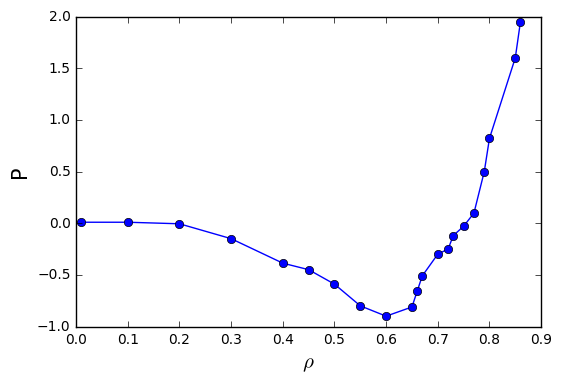

Изотерма при температуре T=2.0.


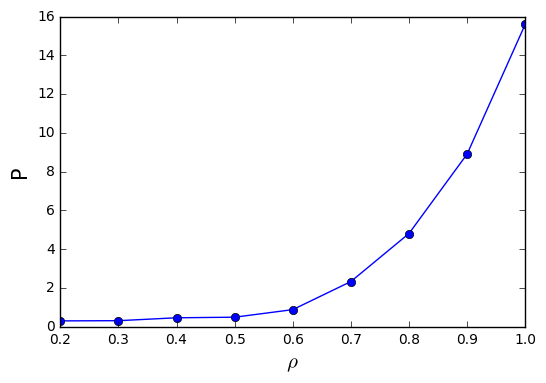

In [298]:
print('Уравнение состояния Леннард-Джонсовской жидкости.')
print()
print('Изотерма при температуре ниже критической: T=0.9.')
plt.plot(data_temp09['dens'], data_temp09['pressure'], 'o-')
plt.xlabel(r'$\rho$', fontsize=15)
plt.ylabel('P', fontsize=15)
plt.show()


print('Изотерма при температуре T=2.0.')
plt.plot(data_temp20['dens'], data_temp20['pressure'], 'o-')
plt.xlabel(r'$\rho$', fontsize=15)
plt.ylabel('P', fontsize=15)
plt.show()